In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import scienceplots
%matplotlib inline

import sys
sys.path.append("../../../../src")

import nanonets_utils

cap_folder = "/home/j/j_mens07/phd/data/1_funding_period/current/cap_disorder/"
res_folder = "/home/j/j_mens07/phd/data/1_funding_period/current/res_disorder/"
plt.style.use(["science","bright","grid"])


In [3]:
data_cap    = {i : nanonets_utils.prepare_for_fitness_calculation(pd.read_csv(f"{cap_folder}Nx=13_Ny=13_Nz=1_Ne=8_2.0_{i}.csv"), N_e=8, input_cols=['E1','E3']) for i in range(36)}
data_res    = {i : nanonets_utils.prepare_for_fitness_calculation(pd.read_csv(f"{res_folder}Nx=13_Ny=13_Nz=1_Ne=8_5.0_{i}.csv"), N_e=8, input_cols=['E1','E3']) for i in range(36)}
fitness_cap = {key : nanonets_utils.fitness(df, input_cols=['E1','E3']) for key, df in data_cap.items()}
fitness_res = {key : nanonets_utils.fitness(df, input_cols=['E1','E3']) for key, df in data_res.items()}

In [6]:
sets_of_abc     = [set(df[['E0', 'E2', 'E4','E5','E6']].itertuples(index=False, name=None)) for _, df in fitness_res.items()]
common_abc      = set.intersection(*sets_of_abc)
dfs_filtered    = [df[df.set_index(['E0', 'E2', 'E4','E5','E6']).index.isin(common_abc)].reset_index(drop=True) for _, df in fitness_res.items()]

In [55]:
f_combs = []
for i in range(36):
    for j in range(i,36):
        ands    = dfs_filtered[i]['AND Fitness'].values
        xors    = dfs_filtered[j]['XOR Fitness'].values
        f_comb  = np.sqrt(ands*xors)
        f_combs.append(f_comb)

/tmp/ipykernel_11940/1459135204.py:6: RuntimeWarning: invalid value encountered in sqrt
  f_comb  = np.sqrt(ands*xors)


In [54]:
np.array(f_combs).flatten()

array([nan, nan, nan, ..., nan, nan, nan])

In [ ]:
fig = plt.figure(dpi=200)
fig.set_figwidth(fig.get_figwidth()*1.2)
ax  = fig.add_subplot()
ax  = sns.kdeplot(np.array(f_combs).flatten(), fill=True, alpha=0.4, log_scale=True)
ax.set_xlim(2e-2, 1e1)
ax.set_xlabel("$\sqrt{F_{AND}F_{XOR}}$", fontsize='x-large')
ax.set_ylabel("Density", fontsize='x-large')
fig.savefig("../plots/AND_XOR_Fitness.svg", transparent=True, bbox_inches='tight')

In [27]:
dfs_filtered[4]

,E0,E1,E2,E3,E4,E5,E6,E7,G,Eq_Jumps,Jumps,AND Fitness,OR Fitness,XOR Fitness,NAND Fitness,NOR Fitness,XNOR Fitness
0,-0.099998,0.005,0.033768,0.005,0.051561,0.033808,-0.003128,-0.050198,0.0,100000.0,57500.0,3.317763,1.231850,-0.524455,-3.211222,-1.216860,0.527220
1,-0.099951,0.005,-0.053725,0.005,0.041220,0.089924,0.085050,0.031633,0.0,100000.0,2580000.0,1.182235,11.606298,0.937640,-1.168421,-10.399321,-0.928930
2,-0.099937,0.005,0.099468,0.005,-0.029342,-0.023807,-0.057379,0.063745,0.0,100000.0,42500.0,0.571997,0.175549,-0.285224,-0.575287,-0.175858,0.284413
3,-0.099886,0.005,-0.016753,0.005,0.055099,0.077473,0.049574,0.036607,0.0,100000.0,10000000.0,-0.728489,-0.457924,0.184639,0.733835,0.460031,-0.184299
4,-0.099859,0.005,0.015202,0.005,0.075615,0.085135,-0.046070,-0.027023,0.0,100000.0,121250.0,0.808421,0.618903,-0.119791,-0.801938,-0.615096,0.119935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10858,0.099936,0.005,0.023048,0.005,-0.027187,-0.022484,0.005277,0.008921,0.0,100000.0,9576250.0,1.926187,0.999588,-0.427823,-1.964018,-1.009681,0.426001
10859,0.099942,0.005,-0.024841,0.005,0.026032,0.097093,-0.003159,0.043830,0.0,100000.0,10000000.0,-0.795874,1.855987,2.932543,0.793850,-1.870117,-2.925538
10860,0.099960,0.005,0.041449,0.005,0.047894,-0.009582,-0.085908,-0.053729,0.0,100000.0,192500.0,6.080939,1.091029,-0.855069,-5.732358,-1.079254,0.862444
10861,0.099975,0.005,-0.045220,0.005,0.054231,-0.066542,0.054956,-0.085767,0.0,100000.0,47500.0,-3.130257,0.245096,2.657994,3.231409,-0.244496,-2.589173


In [28]:
df_and          = pd.DataFrame([df['AND Fitness'].values for df in dfs_filtered]).T
df_xor          = pd.DataFrame([df['XOR Fitness'].values for df in dfs_filtered]).T
df_both         = pd.DataFrame([np.argmax(df_and.values, axis=1), df_and.max(axis=1).values, np.argmax(df_xor.values, axis=1), df_xor.max(axis=1).values]).T
df_both['Sum']  = df_both[1]+df_both[3]
df_both

,0,1,2,3,Sum
0,26.0,5.477780,29.0,3.621873,9.099653
1,35.0,9.393159,20.0,4.601114,13.994272
2,23.0,4.912859,35.0,3.245483,8.158342
3,33.0,18.981201,8.0,3.181165,22.162366
4,7.0,6.060852,2.0,12.645012,18.705864
...,...,...,...,...,...
10858,33.0,49.620035,14.0,6.592439,56.212474
10859,24.0,5.726637,9.0,13.341115,19.067752
10860,18.0,7.080422,29.0,3.936927,11.017349
10861,0.0,4.511435,25.0,5.058197,9.569632


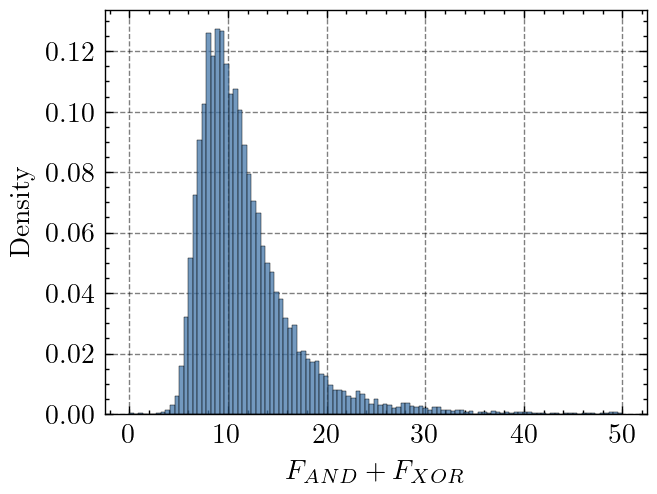

In [29]:
fig = plt.figure(dpi=200)
ax  = fig.add_subplot()
ax  = sns.histplot(df_both['Sum'].values, binrange=(0,50), stat='density', ax=ax)
ax.set_xlabel("$F_{AND} + F_{XOR}$")

fig.savefig("../plots/and_to_xor_switch_dist.svg", transparent=True, bbox_inches='tight')
fig.savefig("../plots/and_to_xor_switch_dist.pdf", transparent=False, bbox_inches='tight')

In [30]:
df_both.sort_values(by='Sum')

,0,1,2,3,Sum
1237,22.0,-0.758196,21.0,0.368320,-0.389876
10075,30.0,-0.160393,2.0,0.543606,0.383214
10289,14.0,0.075236,3.0,1.046365,1.121601
5473,17.0,3.047206,10.0,-0.033056,3.014150
4785,33.0,2.662846,28.0,0.724938,3.387784
...,...,...,...,...,...
7380,8.0,159.902259,5.0,2.014635,161.916893
2104,35.0,187.280240,19.0,4.065886,191.346126
10033,7.0,289.799735,27.0,4.409359,294.209094
361,22.0,325.588798,23.0,5.371647,330.960444


In [31]:
dfs_filtered[24].iloc[10859,:]

E0              9.994203e-02
E1              5.000000e-03
E2             -2.484146e-02
E3              5.000000e-03
E4              2.603210e-02
E5              9.709341e-02
E6             -3.158572e-03
E7              4.382957e-02
G               0.000000e+00
Eq_Jumps        1.000000e+05
Jumps           7.188750e+06
AND Fitness     5.726637e+00
OR Fitness      1.815992e+00
XOR Fitness    -5.477722e-01
NAND Fitness   -5.545887e+00
NOR Fitness    -1.829177e+00
XNOR Fitness    5.486131e-01
Name: 10859, dtype: float64

In [32]:
dfs_filtered[9].iloc[10859,:]

E0              9.994203e-02
E1              5.000000e-03
E2             -2.484146e-02
E3              5.000000e-03
E4              2.603210e-02
E5              9.709341e-02
E6             -3.158572e-03
E7              4.382957e-02
G               0.000000e+00
Eq_Jumps        1.000000e+05
Jumps           8.540000e+06
AND Fitness    -1.692414e+00
OR Fitness      1.508601e+00
XOR Fitness     1.334111e+01
NAND Fitness    1.668102e+00
NOR Fitness    -1.529056e+00
XNOR Fitness   -1.379957e+01
Name: 10859, dtype: float64

In [33]:
and_labels  = dfs_filtered[24].loc[10859,'E0':'E7']
xor_labels  = dfs_filtered[9].loc[10859,'E0':'E7']

In [34]:
df_and_sample   = data_res[24].copy()
df_xor_sample   = data_res[9].copy()

In [35]:
and_currents    = df_and_sample[df_and_sample['E0']==and_labels['E0']]['Current'].values
and_errros      = df_and_sample[df_and_sample['E0']==and_labels['E0']]['Error'].values

In [36]:
xor_currents    = df_xor_sample[df_xor_sample['E0']==xor_labels['E0']]['Current'].values
xor_errors      = df_xor_sample[df_xor_sample['E0']==xor_labels['E0']]['Error'].values

/tmp/ipykernel_11940/3057596582.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["$U_{00}$","$U_{01}$","$U_{10}$","$U_{11}$"], fontsize='x-large')


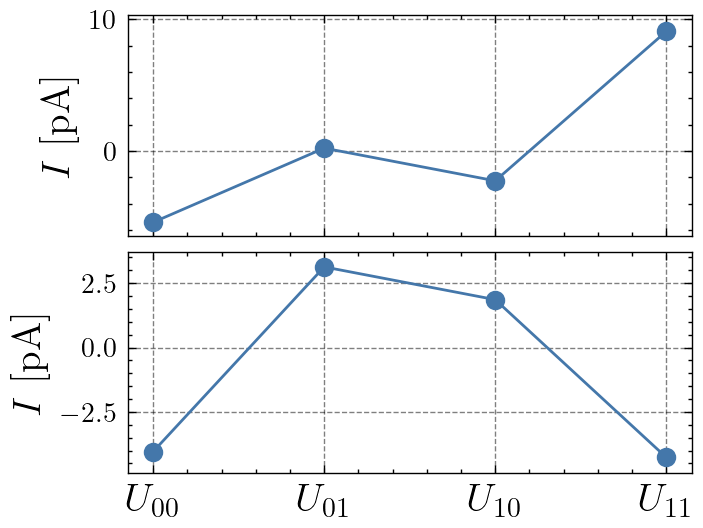

In [37]:
fig = plt.figure(dpi=200, layout='constrained')
ax  = fig.add_subplot(2,1,1)
ax.errorbar(["$U_{00}$","$U_{01}$","$U_{10}$","$U_{11}$"], and_currents, and_errros, marker='o', capsize=2)
ax.set_xticklabels("")
ax.set_ylabel("$I$ [pA]", fontsize='x-large')
ax  = fig.add_subplot(2,1,2)
ax.errorbar(["$U_{00}$","$U_{01}$","$U_{10}$","$U_{11}$"], xor_currents, xor_errors, marker='o', capsize=2)
ax.set_xticklabels(["$U_{00}$","$U_{01}$","$U_{10}$","$U_{11}$"], fontsize='x-large')
ax.set_ylabel("$I$ [pA]", fontsize='x-large')

fig.savefig("../plots/and_to_xor_switch_example.svg", transparent=True, bbox_inches='tight')
fig.savefig("../plots/and_to_xor_switch_example.pdf", transparent=False, bbox_inches='tight')

/tmp/ipykernel_11940/1661838002.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["$U_{00}$","$U_{01}$","$U_{10}$","$U_{11}$"], fontsize='x-large')


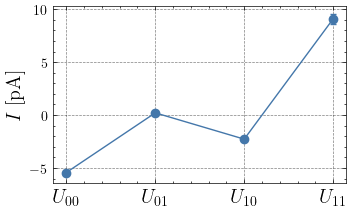

In [45]:
fig = plt.figure(layout='constrained')
fig.set_figheight(fig.get_figheight()*0.8)
ax  = fig.add_subplot()
ax.errorbar(["$U_{00}$","$U_{01}$","$U_{10}$","$U_{11}$"], and_currents, and_errros, marker='o', capsize=2)
ax.set_xticklabels(["$U_{00}$","$U_{01}$","$U_{10}$","$U_{11}$"], fontsize='x-large')
ax.set_ylabel("$I$ [pA]", fontsize='x-large')

fig.savefig("../plots/and_switch_example.svg", transparent=True, bbox_inches='tight')
fig.savefig("../plots/and_switch_example.pdf", transparent=False, bbox_inches='tight')

/tmp/ipykernel_11940/3240348049.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["$U_{00}$","$U_{01}$","$U_{10}$","$U_{11}$"], fontsize='x-large')


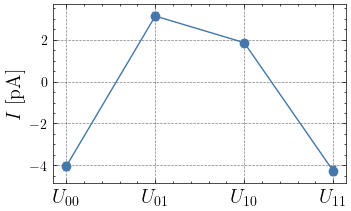

In [44]:
fig = plt.figure(layout='constrained')
fig.set_figheight(fig.get_figheight()*0.8)
ax  = fig.add_subplot()
ax.errorbar(["$U_{00}$","$U_{01}$","$U_{10}$","$U_{11}$"], xor_currents, xor_errors, marker='o', capsize=2)
ax.set_xticklabels(["$U_{00}$","$U_{01}$","$U_{10}$","$U_{11}$"], fontsize='x-large')
ax.set_ylabel("$I$ [pA]", fontsize='x-large')

fig.savefig("../plots/xor_switch_example.svg", transparent=True, bbox_inches='tight')
fig.savefig("../plots/xor_switch_example.pdf", transparent=False, bbox_inches='tight')